In [1]:
from arbok.samples.sunshine.readout.other_ST_read import OtherStReadout
from arbok.samples.sunshine.initialization.mixed_down_up_init import (
    MixedDownUpInit
)
from arbok.samples.sunshine.configs.rf2v_config import rf2v_config

2023-07-12 19:47:56,950 - qm - INFO     - Starting session: 0c4a1dc7-c036-46df-8da9-942b9588a441


In [2]:
from qm.qua import *
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.simulate.credentials import create_credentials
from qm import SimulationConfig

In [3]:
from arbok.core.quantify_handler import QuantifyHandler
from arbok.core.sample import Sample

In [4]:
rd = OtherStReadout()
init = MixedDownUpInit()

Added elements: ['P1', 'J1', 'P2']
Added unit_amp successfully!
Added tPreControl successfully!
Added vHome_P1 successfully!
Added vHome_J1 successfully!
Added vHome_P2 successfully!
Added vDeltaM_P1 successfully!
Added vDeltaM_J1 successfully!
Added vDeltaM_P2 successfully!
Added tPreControlRampMixed successfully!
Added tInitLoadMixed successfully!
Added vInitPreLoadMixed1_P1 successfully!
Added vInitPreLoadMixed1_J1 successfully!
Added vInitPreLoadMixed1_P2 successfully!
Added tInitPreLoad successfully!
Added tInitPreLoadRamp successfully!
Added tControl successfully!
Added tInitLoadRamp successfully!
Added vInitMixed2_P1 successfully!
Added vInitMixed2_J1 successfully!
Added vInitMixed2_P2 successfully!


In [5]:
sunshine = Sample('sunshine', rf2v_config)
qh = QuantifyHandler('CNOT', sunshine)

Added unit_amp successfully!


In [6]:
qh.add_subsequence(init)

Added elements: ['P1', 'J1', 'P2']
Duplicate paramter "unit_amp" skipped
Added tPreControl successfully!
Added vHome_P1 successfully!
Added vHome_J1 successfully!
Added vHome_P2 successfully!
Added vDeltaM_P1 successfully!
Added vDeltaM_J1 successfully!
Added vDeltaM_P2 successfully!
Added tPreControlRampMixed successfully!
Added tInitLoadMixed successfully!
Added vInitPreLoadMixed1_P1 successfully!
Added vInitPreLoadMixed1_J1 successfully!
Added vInitPreLoadMixed1_P2 successfully!
Added tInitPreLoad successfully!
Added tInitPreLoadRamp successfully!
Added tControl successfully!
Added tInitLoadRamp successfully!
Added vInitMixed2_P1 successfully!
Added vInitMixed2_J1 successfully!
Added vInitMixed2_P2 successfully!


In [7]:
qh.unit_amp()
qh.tInitLoadMixed(int(2e3/4))

In [8]:
prog1 = qh.get_program()

500


2023-07-12 19:48:00,651 - qm - INFO     - Performing health check
2023-07-12 19:48:01,538 - qm - INFO     - Health check passed
500
2023-07-12 19:48:02,284 - qm - INFO     - Simulating program


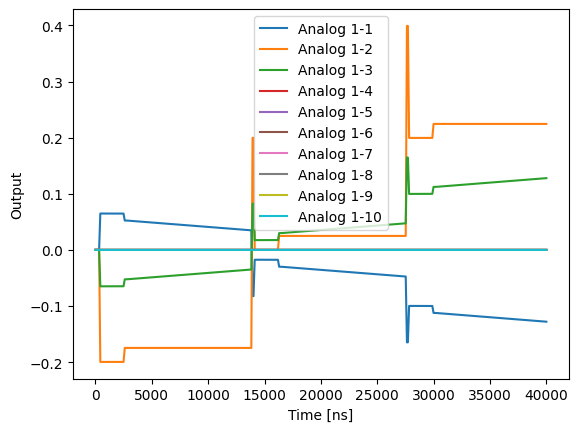

In [9]:
qh.run_remote_simulation(duration = 10000)

In [10]:
#with program() as prog1:
#    init.qua_sequence()

with program() as prog2:
    rd.qua_sequence()

In [11]:
QMM = QuantumMachinesManager(
    host='dzurak-6d066ea0.quantum-machines.co',
    port=443,
    credentials=create_credentials()
)

2023-07-12 19:48:12,035 - qm - INFO     - Performing health check
2023-07-12 19:48:12,902 - qm - INFO     - Health check passed


2023-07-12 19:48:13,584 - qm - INFO     - Simulating program


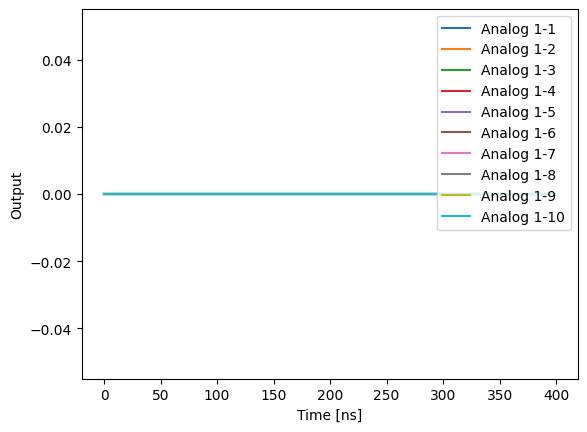

In [12]:
job = QMM.simulate(rf2v_config, prog1, SimulationConfig(duration=100))

samples = job.get_simulated_samples()
samples.con1.plot()

In [13]:
job = QMM.simulate(rf2v_config, prog2, SimulationConfig(duration=100))

samples = job.get_simulated_samples()
samples.con1.plot()

2023-07-12 19:48:17,769 - qm - INFO     - Simulating program
2023-07-12 19:48:18,288 - qm - ERROR    - Unexpected error: Failed to compile job
2023-07-12 19:48:18,288 - qm - ERROR    - Quantum Element P3 at NO_LOCATION is not configured (@ NO_LOCATION)
2023-07-12 19:48:18,289 - qm - ERROR    - Quantum Element P3 at  is not configured (@ )
2023-07-12 19:48:18,289 - qm - ERROR    - Job 1689009349203 failed. Failed to execute program.


FailedToExecuteJobException: 1689009349203

In [ ]:
print(str([0,1]))